In [ ]:
del modelProjectANNR

In [ ]:
# Mohd Edreen Shazreen Bin M Yusuf
# Muhammad Alif Izzat Bin Alias
# Rollie Bin Isran
# Yukrizzan Bin Tomoyoshi Kajiwara @ Mohd Nasir

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('Sales', axis=1)
y=df.Sales.copy()

#training and testing split using all feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

modelProjectANNR = Sequential()
#modelANNR.add(Dense(12, input_dim=X_train.shape[1], activation='relu')) #input_dim need to follow the input column
modelProjectANNR.add(Dense(12, input_dim=3, activation='relu')) #input_dim need to follow the input column
modelProjectANNR.add(Dense(8, activation='relu'))
modelProjectANNR.add(Dense(1))

In [ ]:
modelProjectANNR.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.03), metrics=['mean_squared_error'])

In [ ]:
history = modelProjectANNR.fit(X_train, y_train , validation_data=(X_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
14/14 [==============================] - 1s 12ms/step - loss: 332.4053 - mean_squared_error: 332.4053 - val_loss: 40.0206 - val_mean_squared_error: 40.0206
Epoch 2/20
14/14 [==============================] - 0s 3ms/step - loss: 33.4669 - mean_squared_error: 33.4669 - val_loss: 34.9290 - val_mean_squared_error: 34.9290
Epoch 3/20
14/14 [==============================] - 0s 4ms/step - loss: 18.7865 - mean_squared_error: 18.7865 - val_loss: 25.2265 - val_mean_squared_error: 25.2265
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 11.5522 - mean_squared_error: 11.5522 - val_loss: 14.7016 - val_mean_squared_error: 14.7016
Epoch 5/20
14/14 [==============================] - 0s 5ms/step - loss: 7.2183 - mean_squared_error: 7.2183 - val_loss: 10.2280 - val_mean_squared_error: 10.2280
Epoch 6/20
14/14 [==============================] - 0s 4ms/step - loss: 4.6236 - mean_squared_error: 4.6236 - val_loss: 4.7935 - val_mean_squared_error: 4.7935
Epoch 7/20
14/14 [=

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
15,1.929523,1.929523,3.497691,3.497691,15
16,1.925481,1.925481,2.644447,2.644447,16
17,1.727909,1.727909,2.757137,2.757137,17
18,1.580503,1.580503,2.207537,2.207537,18
19,1.460538,1.460538,2.078355,2.078355,19


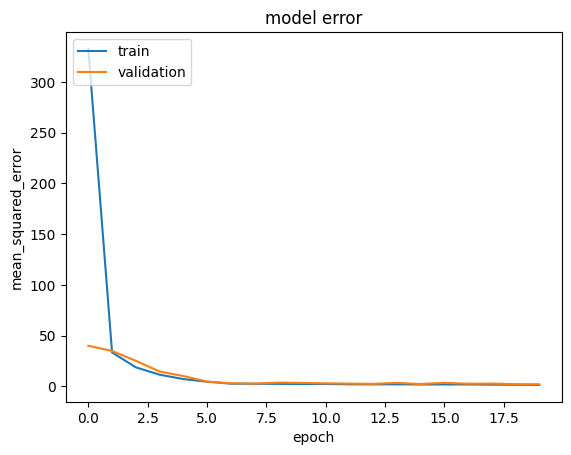

In [ ]:
plt.plot(hist['mean_squared_error'])
plt.plot(hist['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = modelProjectANNR.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean absolute error
print("Mean absolute error: {} ".format(mean_absolute_error(y_test, y_pred)))

# The mean squared error
print("Mean squared error: {} ".format(mean_squared_error(y_test, y_pred)))

# Root mean squared error
print("Root mean squared error: {} ".format(mean_squared_error(y_test, y_pred)**0.5))

# Explained variance score: 1 is perfect prediction
print('Variance score: {} '.format(r2_score(y_test,y_pred)))

Mean absolute error: 1.1088107609748838 
Mean squared error: 2.0783550073563197 
Root mean squared error: 1.441650098795238 
Variance score: 0.9182377609916147 


In [ ]:
df_prediction = pd.DataFrame({'Actual': y_test})
df_prediction['Predicted'] = y_pred
df_prediction

,Actual,Predicted
112,14.1,13.093235
29,10.5,9.446997
182,8.7,6.575621
199,13.4,13.990360
193,19.6,18.959690
85,15.2,16.294321
10,8.6,6.807835
54,20.2,20.123037
115,12.6,13.420311
35,12.8,15.432148


Text(0, 0.5, 'Sales')

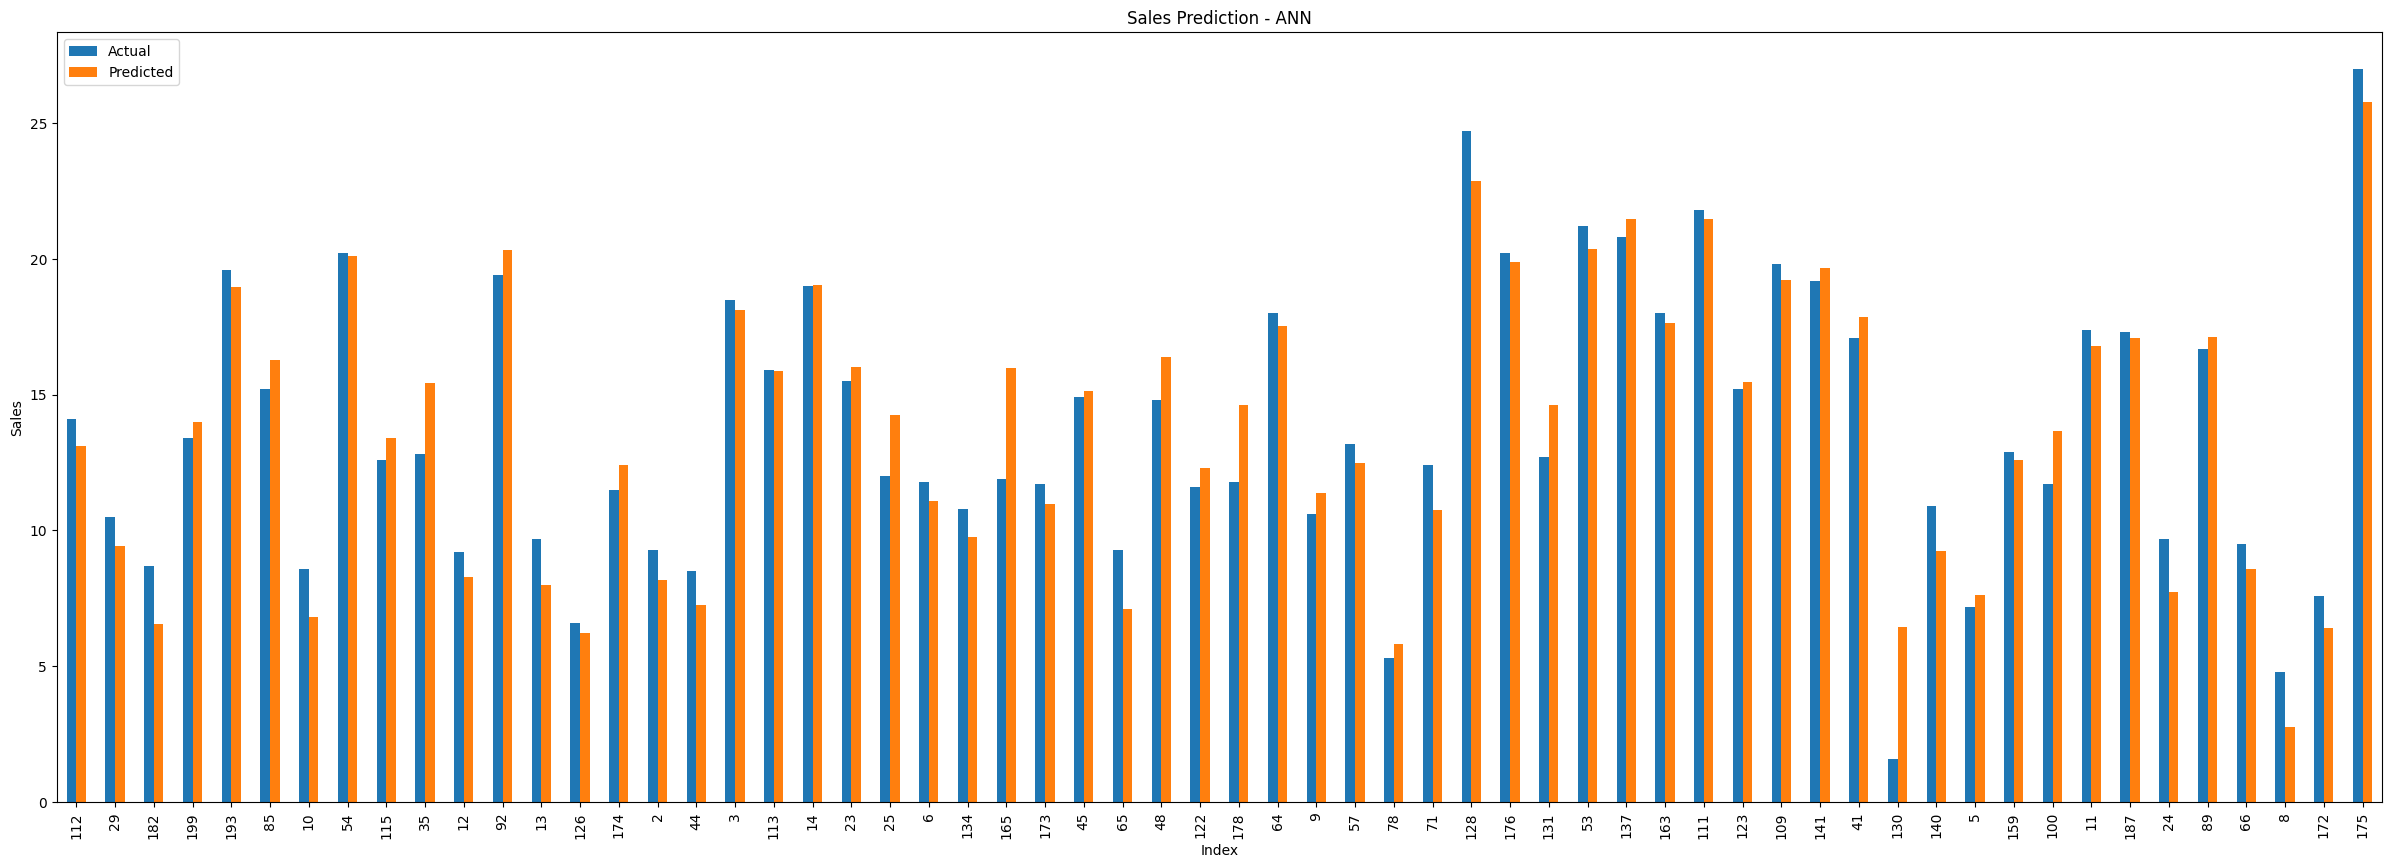

In [ ]:
import matplotlib.pyplot as plt

df_prediction.plot(kind="bar", figsize=(30,10))

plt.title('Sales Prediction - ANN')
plt.xlabel('Index')
plt.ylabel('Sales')

In [ ]:
import pickle
pickle.dump(modelProjectANNR, open('Sales-Model-ARNN-Project-V4.h5','wb'))

print("models saved")

models saved
